In [1]:
import numpy as np
import pandas as pd
from salesplansuccess.api import SalesPlanSuccess

In [2]:
pd.set_option('display.precision', 2)

### Generation of a random historical sales dataset with downtrend of -15 log% per month but a positive drift of 40 log% every third month at the end of a quarter

In [3]:
sales = np.random.normal(loc = -0.15, scale = 0.22, size=(54,)) + np.tile(np.array([0.0, 0.4, 0.0]), 19)[:-3]

### Applying the ARIMA(2,0,0) model to the random historical sales dataset with AR1 and AR2 coefficients −0.3 and −0.55 respectively

In [4]:
sales[1] -= 0.3 * sales[0]
for i in range(2, sales.shape[0]):
    sales[i] += -0.55 * sales[i-2] -0.3 * sales[i-1]

### Converting the random logarithmic monthly sales changes into cummulative logarithmic sales changes, then scaling the initial monthly sales to 100.0 and converting from logarithmic to regular sales numbers

In [5]:
sales = np.exp(np.concatenate((np.array([0.0]), sales)).cumsum() + np.log(100.0))

### Creating the historical sales data pandas DataFrame in the format ready to feed into SalesPlanSuccess class

In [6]:
historical_data = pd.DataFrame({'Year': ((np.zeros((5,12),dtype='int64') + 2018) + np.arange(5).reshape(5, 1)).flatten()[:-5], 
                                'Month': np.tile(np.arange(1,13), 5)[:-5], 
                                'Sales': sales})

### Looking at the generated random historical sales dataset

In [7]:
historical_data

,Year,Month,Sales
0,2018,1,100.00
1,2018,2,102.71
2,2018,3,186.99
3,2018,4,130.85
4,2018,5,143.76
5,2018,6,246.37
6,2018,7,176.14
7,2018,8,138.16
8,2018,9,154.84
9,2018,10,214.47


### Creating an object of the class SalesPlanSuccess, feeding into it the historical sales data and annual sales plan for the current year 2022

In [8]:
sps = SalesPlanSuccess(data = historical_data, plan = 4700)

### Processing the fed dataset and estimating the parameters of the ARIMA(2,1,0) model with one external regressor

In [9]:
sps.fit()

### Looking at the estimates of the parameters of the ARIMA(2,1,0) model from the previous step

In [10]:
sps.model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:                 ARIMA(2, 0, 0)   Log Likelihood                   3.684
Date:                Sun, 04 Sep 2022   AIC                              2.631
Time:                        21:06:14   BIC                             12.576
Sample:                             0   HQIC                             6.467
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1970      0.063     -3.108      0.002      -0.321      -0.073
x1             0.6520      0.175      3.717      0.000       0.308       0.996
ar.L1         -0.6925      0.126     -5.490      0.000      -0.940      -0.445
ar.L2         -0.5691      0.122     -4.660      0.000      -0.808      -0.330
sigma2         0.0501      0.013      3.964      0.000       0.025       0.075
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.33   Prob(JB):                         0.46
Heteroskedasticity (H):               0.80   Skew:                            -0.15
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### A Monte Carlo simulation for the final months of the current year 2022 (or if the dataset had ended with the month 12, then for the 12 months of the next year 2023)
#### The sample size does not affect the speed at this stage but may significantly slow plotting at the next stage

In [11]:
sps.simulate(sample_size=50000)

### On the plot below, the X axis shows the expected annual sales vs. the plan for the current (or next) year according to the Monte Carlo simulation from the previous step

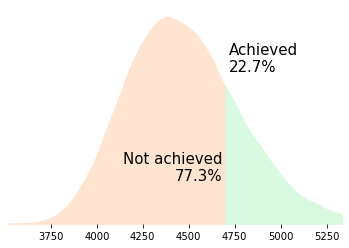

In [12]:
sps.plot(failure_color='#FFE5D1', success_color='#D9FAE0')